In [1]:
#Imports
import pandas as pd
import functions as func
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

db_locations = func.import_yaml()

#load df
df_1 = pd.read_csv(db_locations['data_clean']['user_data'])
df_2 = pd.read_csv(db_locations['data_clean']['user_logs'])

In [2]:
df_1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45.0,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,111.0,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52.0,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67.0,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,104.0,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50482,1780858,21.0,262.0,68.5,M,3.0,372.0,6.0,9.0,Test
50483,6967120,21.0,260.0,68.5,M,3.0,4280.0,6.0,9.0,Control
50484,5826160,20.0,249.0,56.5,F,2.0,45.0,2.0,5.0,Test
50485,8739285,19.0,229.0,69.5,F,2.0,45.0,1.0,4.0,Test


In [3]:
df_2

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds,error
0,5867343,100011869_84756704576,406596333_52561114200_989487,start,2017-06-05 02:47:42,NaN,NaN,NaN,0
1,5867343,100011869_84756704576,406596333_52561114200_989487,step_1,2017-06-05 02:47:47,2017-06-05 02:47:42,0 days 00:00:05,5.0,0
2,5867343,100011869_84756704576,406596333_52561114200_989487,step_2,2017-06-05 02:48:03,2017-06-05 02:47:47,0 days 00:00:16,16.0,0
3,5867343,100011869_84756704576,406596333_52561114200_989487,step_3,2017-06-05 02:50:18,2017-06-05 02:48:03,0 days 00:02:15,135.0,0
4,5867343,100011869_84756704576,406596333_52561114200_989487,start,2017-06-05 02:51:11,2017-06-05 02:50:18,0 days 00:00:53,53.0,0
...,...,...,...,...,...,...,...,...,...
744636,7042750,999998529_89539814462,583327415_19513940564_488564,step_2,2017-04-12 11:55:05,2017-04-12 11:52:11,0 days 00:02:54,174.0,1
744637,7042750,999998529_89539814462,583327415_19513940564_488564,step_3,2017-04-12 11:55:13,2017-04-12 11:55:05,0 days 00:00:08,8.0,0
744638,7042750,999998529_89539814462,583327415_19513940564_488564,confirm,2017-04-12 12:04:47,2017-04-12 11:55:13,0 days 00:09:34,574.0,0
744639,7042750,999998529_89539814462,583327415_19513940564_488564,start,2017-04-12 12:09:29,2017-04-12 12:04:47,0 days 00:04:42,282.0,0


In [4]:
#checking errors by users 
df_2['error'].value_counts()

error
0    722722
1     21919
Name: count, dtype: int64

In [5]:
df_2['error'].value_counts(normalize=True)

error
0    0.970564
1    0.029436
Name: proportion, dtype: float64

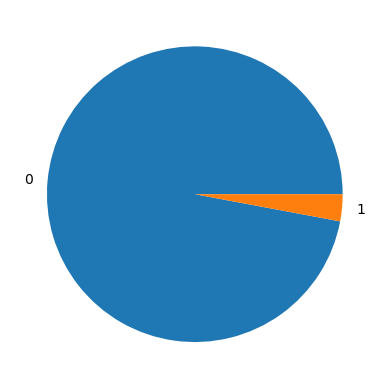

In [6]:
proportion_table = df_2['error'].value_counts(normalize=True)
plt.pie(proportion_table.values, labels = proportion_table.index)
plt.show()

In [7]:
grouped_df = df_2.groupby('client_id')['error'].sum().reset_index()
grouped_df

,client_id,error
0,169,0
1,336,0
2,546,0
3,555,0
4,647,0
...,...,...
120152,9999729,0
120153,9999768,2
120154,9999832,0
120155,9999839,0


In [8]:
# checking if error are related to any other columns
merged_df = pd.merge(df_1, grouped_df, on='client_id', how='inner')
merged_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,error
0,836976,6.0,73.0,60.5,U,2.0,45.0,6.0,9.0,Test,0
1,2304905,7.0,94.0,58.0,U,2.0,111.0,6.0,9.0,Control,0
2,1439522,5.0,64.0,32.0,U,2.0,52.0,6.0,9.0,Test,0
3,1562045,16.0,198.0,49.0,M,2.0,67.0,3.0,6.0,Test,0
4,5126305,12.0,145.0,33.0,F,2.0,104.0,0.0,3.0,Control,0
...,...,...,...,...,...,...,...,...,...,...,...
50482,1780858,21.0,262.0,68.5,M,3.0,372.0,6.0,9.0,Test,0
50483,6967120,21.0,260.0,68.5,M,3.0,4280.0,6.0,9.0,Control,0
50484,5826160,20.0,249.0,56.5,F,2.0,45.0,2.0,5.0,Test,0
50485,8739285,19.0,229.0,69.5,F,2.0,45.0,1.0,4.0,Test,0


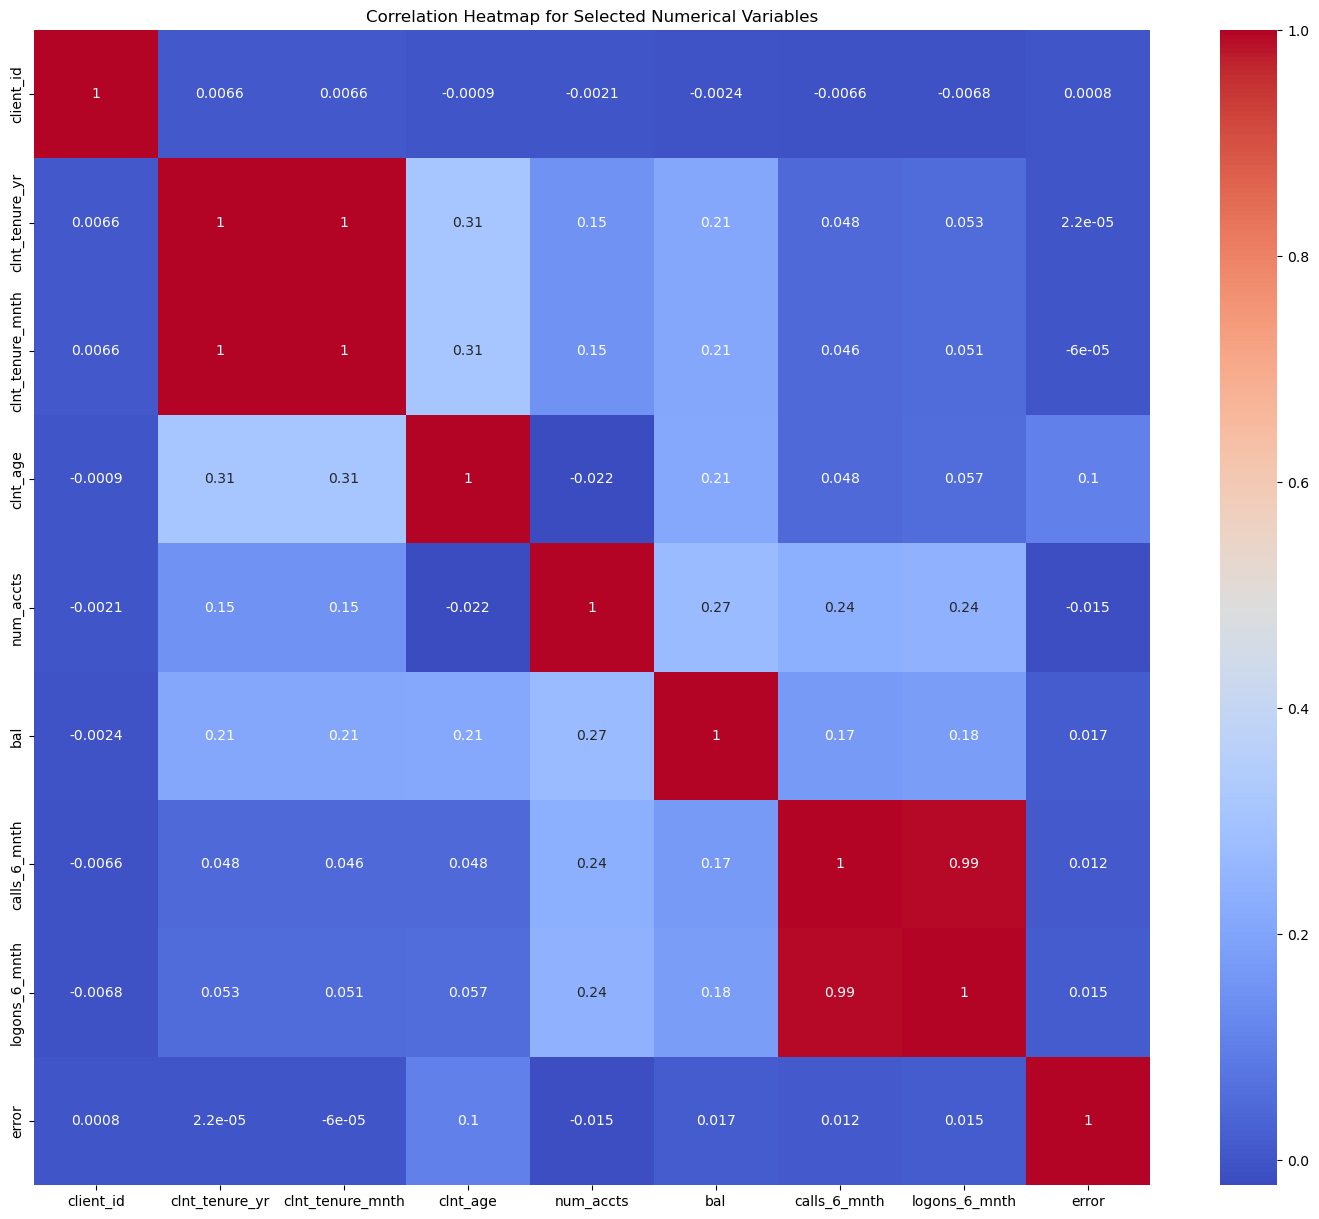

In [9]:
correlation_matrix = merged_df.select_dtypes("number").corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [10]:
crosstab_result = pd.crosstab(merged_df['error'], merged_df['Variation'])
crosstab_result


Variation,Control,Test
error,,
0,20824,23738
1,1869,1879
2,620,932
3,142,180
4,44,125
5,20,48
6,5,16
7,0,22
8,1,7


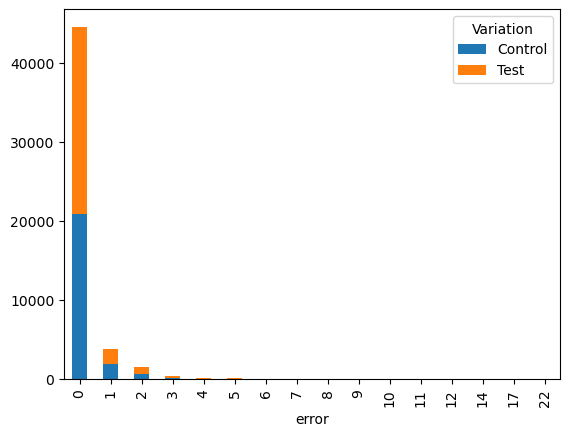

In [11]:
crosstab_result.plot(kind="bar", stacked=True);

In [12]:
crosstab_result = pd.crosstab(merged_df['error'], merged_df['gendr'])
crosstab_result


gendr,F,M,U,X
error,,,,
0,14377,15198,14985,2
1,1077,1094,1577,0
2,561,470,521,0
3,117,99,106,0
4,74,47,48,0
5,27,18,23,0
6,8,7,6,0
7,11,1,10,0
8,1,5,2,0


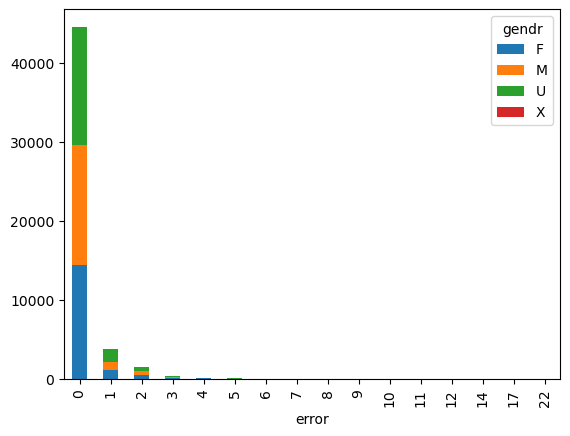

In [13]:
crosstab_result.plot(kind="bar", stacked=True);

In [14]:
#Testing error rate
#total:
# Calculate the number of backward 
backward_steps = df_2['error'].sum()

# Calculate the total steps taken by 'Test' users
total_steps = df_2.shape[0]

# Calculate the error rate
error_rate_test = backward_steps / total_steps if total_steps > 0 else 0
error_rate_test

0.029435660942655588

In [1]:
#merging to use
df_variation = pd.merge(df_2, df_1[["client_id","Variation"]], on='client_id', how='inner')


NameError: name 'pd' is not defined

In [16]:

df_test_users = df_variation[df_variation['Variation'] == 'Test']

backward_steps = df_test_users['error'].sum()

# Calculate the total steps taken by 'Test' users
total_steps = df_test_users.shape[0]

# Calculate the error rate
error_rate_test = backward_steps / total_steps if total_steps > 0 else 0
error_rate_test


0.03106261784373567

In [17]:
#For control
df_control_users = df_variation[df_variation['Variation'] == 'Control']

backward_steps = df_control_users['error'].sum()

# Calculate the total steps taken by 'Test' users
total_steps = df_control_users.shape[0]

# Calculate the error rate
error_rate_test = backward_steps / total_steps if total_steps > 0 else 0
error_rate_test

0.027545660312895924

In [20]:
#For age groups (0-20,21-40,41-60,60+)
#merging to use
df_variation = pd.merge(df_2, df_1[["client_id","clnt_age"]], on='client_id', how='inner')



In [22]:
df_test_users = df_variation[df_variation['clnt_age'] <= 20]

backward_steps = df_test_users['error'].sum()

# Calculate the total steps taken by 'Test' users
total_steps = df_test_users.shape[0]

# Calculate the error rate
error_rate_test = backward_steps / total_steps if total_steps > 0 else 0
error_rate_test

0.028048082427017746

In [28]:
df_test_users = df_variation[(df_variation['clnt_age'] > 20)  & (df_variation['clnt_age'] <= 40) ]

backward_steps = df_test_users['error'].sum()

# Calculate the total steps taken by 'Test' users
total_steps = df_test_users.shape[0]

# Calculate the error rate
error_rate_test = backward_steps / total_steps if total_steps > 0 else 0
error_rate_test

0.020307226812521822

In [29]:
df_test_users = df_variation[(df_variation['clnt_age'] > 40)  & (df_variation['clnt_age'] <= 60) ]

backward_steps = df_test_users['error'].sum()

# Calculate the total steps taken by 'Test' users
total_steps = df_test_users.shape[0]

# Calculate the error rate
error_rate_test = backward_steps / total_steps if total_steps > 0 else 0
error_rate_test

0.029266010672460138

In [30]:
df_test_users = df_variation[df_variation['clnt_age'] > 60]

backward_steps = df_test_users['error'].sum()

# Calculate the total steps taken by 'Test' users
total_steps = df_test_users.shape[0]

# Calculate the error rate
error_rate_test = backward_steps / total_steps if total_steps > 0 else 0
error_rate_test

0.04116684841875681

In [34]:
#For age cliente tenure ( 2 - 55 ), groups 0-17,18-34,35-55) 
#merging to use
df_variation = pd.merge(df_2, df_1[["client_id","clnt_tenure_yr"]], on='client_id', how='inner')


In [35]:
df_test_users = df_variation[df_variation['clnt_tenure_yr'] <= 17]

backward_steps = df_test_users['error'].sum()

# Calculate the total steps taken by 'Test' users
total_steps = df_test_users.shape[0]

# Calculate the error rate
error_rate_test = backward_steps / total_steps if total_steps > 0 else 0
error_rate_test

0.02938871473354232

In [37]:
df_test_users = df_variation[(df_variation['clnt_tenure_yr'] > 18)  & (df_variation['clnt_tenure_yr'] <= 34) ]

backward_steps = df_test_users['error'].sum()

# Calculate the total steps taken by 'Test' users
total_steps = df_test_users.shape[0]

# Calculate the error rate
error_rate_test = backward_steps / total_steps if total_steps > 0 else 0
error_rate_test

0.030144533361228795

In [38]:
df_test_users = df_variation[df_variation['clnt_tenure_yr'] > 34]

backward_steps = df_test_users['error'].sum()

# Calculate the total steps taken by 'Test' users
total_steps = df_test_users.shape[0]

# Calculate the error rate
error_rate_test = backward_steps / total_steps if total_steps > 0 else 0
error_rate_test

0.03398058252427184